In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Data Collection

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

In [11]:
reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [12]:
df = pd.DataFrame()

In [13]:
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Booked a flight from Buchar...
1,✅ Trip Verified | Booked online months ago an...
2,✅ Trip Verified | The flight was on time. The...
3,"Not Verified | Angry, disappointed, and unsat..."
4,"✅ Trip Verified | As an infrequent flyer, Bri..."


In [16]:
import os
os.getcwd()

'/Users/adebimpeolorundare'

In [18]:
df.to_csv("/Users/adebimpeolorundare/Desktop/BA_Forage/data/BA_reviews.csv")

In [28]:
#nltk.download() 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt

import nltk

#nltk.download(["stopwords","twitter_samples","vader_lexicon"])
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
#porter = PorterStemmer()

#Lemmatization
lemmatizer = WordNetLemmatizer() 

#Wordcloud
from wordcloud import ImageColorGenerator
from PIL import Image

#import warnings
%matplotlib inline


# Data Pre-processing

In [4]:
#Read the csv file using panda library
df = pd.read_csv("/Users/adebimpeolorundare/Desktop/BA_Forage/data/BA_reviews.csv") 

In [5]:
df.head(5)

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Booked a flight from Buchar...
1,1,✅ Trip Verified | Booked online months ago an...
2,2,✅ Trip Verified | The flight was on time. The...
3,3,"Not Verified | Angry, disappointed, and unsat..."
4,4,"✅ Trip Verified | As an infrequent flyer, Bri..."


In [6]:
df.tail(5)

,Unnamed: 0,reviews
995,995,✅ Trip Verified | \r\nVenice to London City. ...
996,996,✅ Trip Verified | San Francisco to London. Te...
997,997,✅ Trip Verified | Heathrow to Vancouver. The ...
998,998,✅ Trip Verified | London to Bucharest. First ...
999,999,✅ Trip Verified | I forgot I had purchased a ...


In [7]:
#Description about the CSV files 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [8]:
df.shape

(1000, 2)

In [9]:
# Remove duplicate reviews
df_noduplicate = df.drop_duplicates('reviews')

In [10]:
df_noduplicate.shape

(1000, 2)

In [11]:
#Remove mention symbols and @
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '',x)) 
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'@\w+', '',x))
#change text to lowercases
df['reviews'] = df['reviews'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
#Remove Punctuation
df['reviews_no_punc'] = df['reviews'].apply(lambda x: re.sub(r'[^\w\s]', '',x))

In [12]:
df.head(5)

,Unnamed: 0,reviews,reviews_no_punc
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...


In [13]:
#Remove stopwords
stop = stopwords.words('english')

In [14]:
df['reviews_stop'] =df['reviews_no_punc'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [15]:
df.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...


In [20]:
#Tokenization
df['reviews_tokenized'] = df['reviews_stop'].apply(lambda x: re.split('\W+', x))

In [21]:
df.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,review_tokenized,reviews_tokenized
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma...","[trip, verified, booked, flight, bucharest, ma..."
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ...","[trip, verified, booked, online, months, ago, ..."
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s...","[trip, verified, flight, time, crew, polite, s..."
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r...","[verified, angry, disappointed, unsatisfied, r..."
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a...","[trip, verified, infrequent, flyer, british, a..."


In [22]:
#Remove columns not needed from the dataset
df = df.drop(columns=[ 'review_tokenized'])

In [23]:
df.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma..."
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ..."
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s..."
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r..."
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a..."


# Wordcloud: Frequently used words

(-0.5, 399.5, 199.5, -0.5)

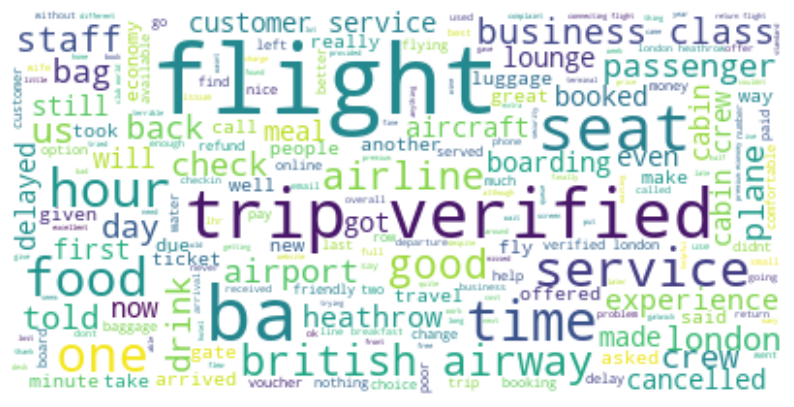

In [125]:
#wordcloud format
long_text = " ".join([i for i in (df['reviews'].values)])
w_cloud = WordCloud(background_color="white", max_words=500,max_font_size = 50, contour_width=10, contour_color='steelblue')
w_cloud.generate(long_text)
plt.figure(figsize = (10,10))
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis('off')

In [18]:
#Lemmatization
from nltk import pos_tag
from nltk.corpus import wordnet

In [19]:
#function to map POS tags from treebank tag into wordnet tags is defined
wordnet_lemma = WordNetLemmatizer()
def get_wordnet(pos):
    if pos.startswith('N'): 
        return wordnet.NOUN
    elif pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN     # return default to noun if no match

    
# Define a function to tag and lemmatize a text string    
def lemmatizer(reviews_no_punc):
    pos_tags = pos_tag(reviews_no_punc)
    reviews_no_punc = [wordnet_lemma.lemmatize(word, pos = get_wordnet(pos)) for word, pos in pos_tags]
    return reviews_no_punc

In [25]:
df['reviews_lemmatized'] = df['reviews_tokenized'].apply(lambda x: lemmatizer(x))

In [26]:
df.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized,reviews_lemmatized
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma...","[trip, verify, booked, flight, bucharest, manc..."
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ...","[trip, verify, booked, online, month, ago, hit..."
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s...","[trip, verify, flight, time, crew, polite, sto..."
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r...","[verified, angry, disappoint, unsatisfied, rou..."
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a...","[trip, verify, infrequent, flyer, british, air..."


In [37]:
df['reviews_cleaned'] = df['reviews_lemmatized'].apply(lambda x: ' '.join(x))

In [38]:
df.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized,reviews_lemmatized,reviews_clean,reviews_length,reviews_cleaned
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma...","[trip, verify, booked, flight, bucharest, manc...",trip verify booked flight bucharest manchester...,1099,trip verify booked flight bucharest manchester...
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ...","[trip, verify, booked, online, month, ago, hit...",trip verify booked online month ago hitch repl...,878,trip verify booked online month ago hitch repl...
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s...","[trip, verify, flight, time, crew, polite, sto...",trip verify flight time crew polite story outw...,383,trip verify flight time crew polite story outw...
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r...","[verified, angry, disappoint, unsatisfied, rou...",verified angry disappoint unsatisfied route lo...,770,verified angry disappoint unsatisfied route lo...
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a...","[trip, verify, infrequent, flyer, british, air...",trip verify infrequent flyer british airway al...,1279,trip verify infrequent flyer british airway al...


In [41]:
#Remove columns not needed from the dataset
df = df.drop(columns=[ 'reviews_clean', 'reviews_length'])

In [42]:
df.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized,reviews_lemmatized,reviews_cleaned
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma...","[trip, verify, booked, flight, bucharest, manc...",trip verify booked flight bucharest manchester...
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ...","[trip, verify, booked, online, month, ago, hit...",trip verify booked online month ago hitch repl...
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s...","[trip, verify, flight, time, crew, polite, sto...",trip verify flight time crew polite story outw...
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r...","[verified, angry, disappoint, unsatisfied, rou...",verified angry disappoint unsatisfied route lo...
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a...","[trip, verify, infrequent, flyer, british, air...",trip verify infrequent flyer british airway al...


# Exploratory Data Analysis

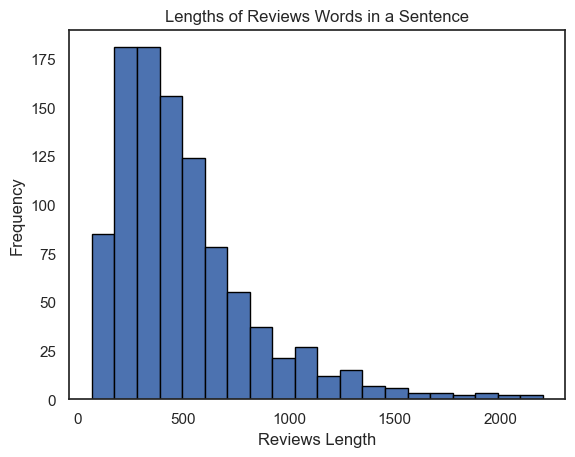

In [132]:
# Calculate text lengths of words
df['reviews_length'] = df['reviews_cleaned'].apply(len)

# Plot a histogram of text lengths of words
df['reviews_length'].plot.hist(bins=20, edgecolor='black')
plt.xlabel('Reviews Length')
plt.ylabel('Frequency')
plt.title('Lengths of Reviews Words in a Sentence')
plt.show()




In [50]:
df.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized,reviews_lemmatized,reviews_cleaned,reviews_length
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma...","[trip, verify, booked, flight, bucharest, manc...",trip verify booked flight bucharest manchester...,662
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ...","[trip, verify, booked, online, month, ago, hit...",trip verify booked online month ago hitch repl...,565
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s...","[trip, verify, flight, time, crew, polite, sto...",trip verify flight time crew polite story outw...,245
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r...","[verified, angry, disappoint, unsatisfied, rou...",verified angry disappoint unsatisfied route lo...,483
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a...","[trip, verify, infrequent, flyer, british, air...",trip verify infrequent flyer british airway al...,752


# Sentiment Analysis- VADER model

In [47]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adebimpeolorundare/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
#import library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [49]:
# read the tweets dataset 
df_SA = df 

In [61]:
#%%time #indictae the process time
# The VADER sentiment analyzer
vader_model = SentimentIntensityAnalyzer()
# assign VADER model to the tweet dataset
df_SA['VADER_scores'] = df_SA['reviews_cleaned'].apply(
    lambda text: vader_model.polarity_scores(text)
)

In [62]:
df_SA.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized,reviews_lemmatized,reviews_cleaned,reviews_length,VADER_scores,sentiment
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma...","[trip, verify, booked, flight, bucharest, manc...",trip verify booked flight bucharest manchester...,662,"{'neg': 0.218, 'neu': 0.656, 'pos': 0.127, 'co...",-0.156373
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ...","[trip, verify, booked, online, month, ago, hit...",trip verify booked online month ago hitch repl...,565,"{'neg': 0.099, 'neu': 0.78, 'pos': 0.122, 'com...",0.106667
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s...","[trip, verify, flight, time, crew, polite, sto...",trip verify flight time crew polite story outw...,245,"{'neg': 0.16, 'neu': 0.667, 'pos': 0.173, 'com...",0.220000
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r...","[verified, angry, disappoint, unsatisfied, rou...",verified angry disappoint unsatisfied route lo...,483,"{'neg': 0.212, 'neu': 0.637, 'pos': 0.151, 'co...",0.214286
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a...","[trip, verify, infrequent, flyer, british, air...",trip verify infrequent flyer british airway al...,752,"{'neg': 0.121, 'neu': 0.774, 'pos': 0.105, 'co...",-0.014583


In [63]:
#Remove columns not needed from the dataset
df_SA = df_SA.drop(columns=['sentiment'])

In [64]:
df_SA.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized,reviews_lemmatized,reviews_cleaned,reviews_length,VADER_scores
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma...","[trip, verify, booked, flight, bucharest, manc...",trip verify booked flight bucharest manchester...,662,"{'neg': 0.218, 'neu': 0.656, 'pos': 0.127, 'co..."
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ...","[trip, verify, booked, online, month, ago, hit...",trip verify booked online month ago hitch repl...,565,"{'neg': 0.099, 'neu': 0.78, 'pos': 0.122, 'com..."
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s...","[trip, verify, flight, time, crew, polite, sto...",trip verify flight time crew polite story outw...,245,"{'neg': 0.16, 'neu': 0.667, 'pos': 0.173, 'com..."
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r...","[verified, angry, disappoint, unsatisfied, rou...",verified angry disappoint unsatisfied route lo...,483,"{'neg': 0.212, 'neu': 0.637, 'pos': 0.151, 'co..."
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a...","[trip, verify, infrequent, flyer, british, air...",trip verify infrequent flyer british airway al...,752,"{'neg': 0.121, 'neu': 0.774, 'pos': 0.105, 'co..."


In [68]:
# VADER polarity score
df_SA["VADER_polarity"] = df_SA["VADER_scores"].apply(
    lambda score_dict: score_dict["compound"]
)
#assign polarity bin
df_SA["VADER_sentiment"] = pd.cut(
   df_SA["VADER_polarity"],
    bins=[-1.0, -0.01, 0.01, 1.0],
    labels=["Negative", "Neutral", "Positive"],
)

In [69]:
df_SA.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized,reviews_lemmatized,reviews_cleaned,reviews_length,VADER_scores,VADER_polarity,VADER_sentiment
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma...","[trip, verify, booked, flight, bucharest, manc...",trip verify booked flight bucharest manchester...,662,"{'neg': 0.218, 'neu': 0.656, 'pos': 0.127, 'co...",-0.8500,Negative
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ...","[trip, verify, booked, online, month, ago, hit...",trip verify booked online month ago hitch repl...,565,"{'neg': 0.099, 'neu': 0.78, 'pos': 0.122, 'com...",0.5248,Positive
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s...","[trip, verify, flight, time, crew, polite, sto...",trip verify flight time crew polite story outw...,245,"{'neg': 0.16, 'neu': 0.667, 'pos': 0.173, 'com...",0.1531,Positive
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r...","[verified, angry, disappoint, unsatisfied, rou...",verified angry disappoint unsatisfied route lo...,483,"{'neg': 0.212, 'neu': 0.637, 'pos': 0.151, 'co...",-0.6486,Negative
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a...","[trip, verify, infrequent, flyer, british, air...",trip verify infrequent flyer british airway al...,752,"{'neg': 0.121, 'neu': 0.774, 'pos': 0.105, 'co...",-0.2960,Negative


Text(0.5, 1.0, 'Distribution of VADER polarity')

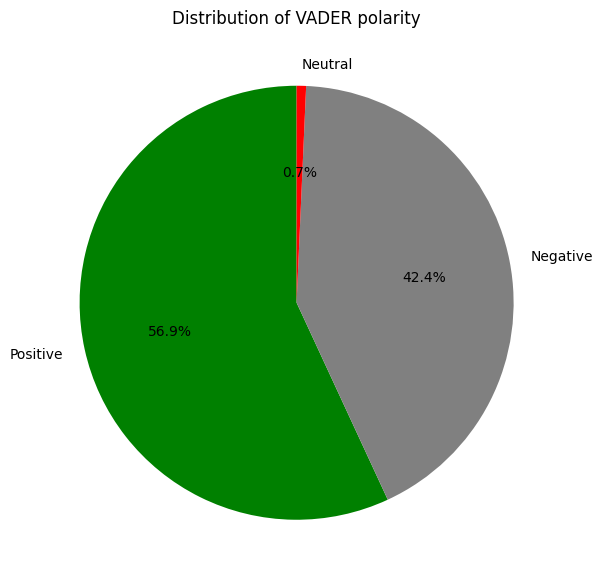

In [88]:
#pie chart to show percentage distribution of polarity
#pie chart visualisation format
fig = plt.figure(figsize=(7,20))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
chart=df_SA['VADER_sentiment'].value_counts()
chart.plot(kind='pie', autopct='%1.1f%%', colors=colors, 
         startangle=90, label='')
plt.title('Distribution of VADER polarity')

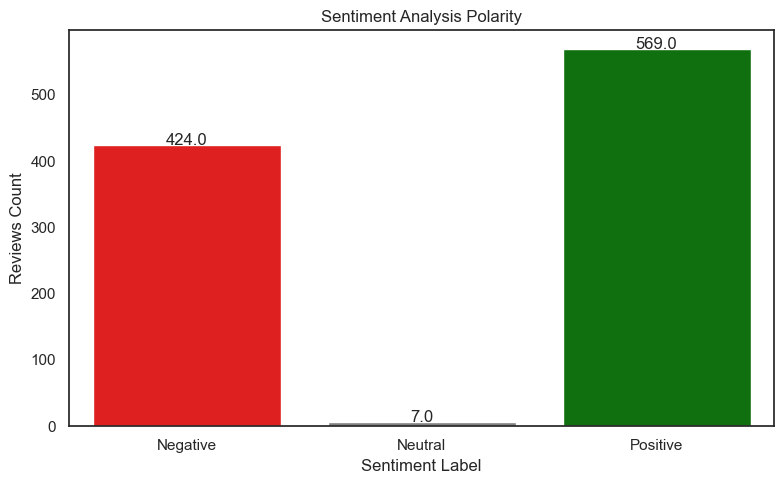

In [104]:
#Tweets sentiment polarity result 
reviews_sentiment_counts = df_SA['VADER_sentiment'].value_counts()

sns.set(style="white")

# barplot to represent tweets sentiment polarity
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=reviews_sentiment_counts.index, y=reviews_sentiment_counts.values, ax=ax, palette = ['red','grey','green'])

# plot title and axis labels
ax.set_title('Sentiment Analysis Polarity')
ax.set_ylabel('Reviews Count')
ax.set_xlabel('Sentiment Label')

# Rotate x-axis labels upright
plt.xticks(rotation='horizontal')

# Add reviews data on each column
for i in ax.patches:
    ax.text(i.get_width()/2 + i.get_x(), i.get_height(), i.get_height(), horizontalalignment='center')

# visualisation chart
plt.tight_layout()
plt.show()

# Topic Modeling

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the preprocessed text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_SA['reviews_cleaned'])

# Apply Latent Dirichlet Allocation
lda = LatentDirichletAllocation(n_components=10, random_state=42)
topics = lda.fit_transform(X)

In [126]:
# Print the topics and associated words
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-10 - 1:-1]  # Get indices of top 20 words
    top_words = [feature_names[i] for i in top_words_idx]
    print(", ".join(top_words))


Topic #1:
flight, get, ba, hour, london, trip, verify, bag, tell, british

Topic #2:
flight, check, ba, british, airway, verify, trip, get, seat, class

Topic #3:
seat, flight, verify, hour, trip, economy, class, board, business, ba

Topic #4:
flight, staff, time, ba, trip, verify, delay, heathrow, hour, london

Topic #5:
luggage, ba, bag, airport, staff, flight, find, one, help, trip

Topic #6:
flight, ba, seat, verify, trip, good, crew, food, time, cabin

Topic #7:
flight, good, seat, service, crew, trip, verify, cabin, ba, food

Topic #8:
flight, ba, customer, call, get, book, hour, verify, cancel, service

Topic #9:
seat, class, flight, business, ba, verify, trip, service, fly, food

Topic #10:
seat, flight, travel, book, airway, british, pay, refund, charge, ba


In [133]:
from textblob import TextBlob

# Function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the 'text_column'
df_SA['sentiment'] = df['reviews_cleaned'].apply(analyze_sentiment)

In [135]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    # Assign labels based on polarity
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [136]:
df_SA.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized,reviews_lemmatized,reviews_cleaned,reviews_length,VADER_scores,VADER_polarity,VADER_sentiment,sentiment
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma...","[trip, verify, booked, flight, bucharest, manc...",trip verify booked flight bucharest manchester...,662,"{'neg': 0.218, 'neu': 0.656, 'pos': 0.127, 'co...",-0.8500,Negative,-0.156373
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ...","[trip, verify, booked, online, month, ago, hit...",trip verify booked online month ago hitch repl...,565,"{'neg': 0.099, 'neu': 0.78, 'pos': 0.122, 'com...",0.5248,Positive,0.106667
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s...","[trip, verify, flight, time, crew, polite, sto...",trip verify flight time crew polite story outw...,245,"{'neg': 0.16, 'neu': 0.667, 'pos': 0.173, 'com...",0.1531,Positive,0.220000
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r...","[verified, angry, disappoint, unsatisfied, rou...",verified angry disappoint unsatisfied route lo...,483,"{'neg': 0.212, 'neu': 0.637, 'pos': 0.151, 'co...",-0.6486,Negative,0.214286
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a...","[trip, verify, infrequent, flyer, british, air...",trip verify infrequent flyer british airway al...,752,"{'neg': 0.121, 'neu': 0.774, 'pos': 0.105, 'co...",-0.2960,Negative,-0.014583


In [137]:
df_SA['sentiment_label'] = df_SA['reviews_cleaned'].apply(analyze_sentiment)


In [138]:
df_SA.head(5)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized,reviews_lemmatized,reviews_cleaned,reviews_length,VADER_scores,VADER_polarity,VADER_sentiment,sentiment,sentiment_label
0,0,trip verified booked a flight from bucharest t...,trip verified booked a flight from bucharest t...,trip verified booked flight bucharest manchest...,"[trip, verified, booked, flight, bucharest, ma...","[trip, verify, booked, flight, bucharest, manc...",trip verify booked flight bucharest manchester...,662,"{'neg': 0.218, 'neu': 0.656, 'pos': 0.127, 'co...",-0.8500,Negative,-0.156373,negative
1,1,trip verified booked online months ago and the...,trip verified booked online months ago and the...,trip verified booked online months ago hitch r...,"[trip, verified, booked, online, months, ago, ...","[trip, verify, booked, online, month, ago, hit...",trip verify booked online month ago hitch repl...,565,"{'neg': 0.099, 'neu': 0.78, 'pos': 0.122, 'com...",0.5248,Positive,0.106667,positive
2,2,trip verified the flight was on time the crew ...,trip verified the flight was on time the crew ...,trip verified flight time crew polite story ou...,"[trip, verified, flight, time, crew, polite, s...","[trip, verify, flight, time, crew, polite, sto...",trip verify flight time crew polite story outw...,245,"{'neg': 0.16, 'neu': 0.667, 'pos': 0.173, 'com...",0.1531,Positive,0.220000,positive
3,3,not verified angry disappointed and unsatisfie...,not verified angry disappointed and unsatisfie...,verified angry disappointed unsatisfied route ...,"[verified, angry, disappointed, unsatisfied, r...","[verified, angry, disappoint, unsatisfied, rou...",verified angry disappoint unsatisfied route lo...,483,"{'neg': 0.212, 'neu': 0.637, 'pos': 0.151, 'co...",-0.6486,Negative,0.214286,positive
4,4,trip verified as an infrequent flyer british a...,trip verified as an infrequent flyer british a...,trip verified infrequent flyer british airways...,"[trip, verified, infrequent, flyer, british, a...","[trip, verify, infrequent, flyer, british, air...",trip verify infrequent flyer british airway al...,752,"{'neg': 0.121, 'neu': 0.774, 'pos': 0.105, 'co...",-0.2960,Negative,-0.014583,negative


In [139]:
df_SA.tail(10)

,Unnamed: 0,reviews,reviews_no_punc,reviews_stop,reviews_tokenized,reviews_lemmatized,reviews_cleaned,reviews_length,VADER_scores,VADER_polarity,VADER_sentiment,sentiment,sentiment_label
990,990,trip verified boarding was fairly quick the we...,trip verified boarding was fairly quick the we...,trip verified boarding fairly quick well turne...,"[trip, verified, boarding, fairly, quick, well...","[trip, verify, board, fairly, quick, well, tur...",trip verify board fairly quick well turned sta...,351,"{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...",0.9274,Positive,0.269231,positive
991,991,trip verified bangalore to london ground exper...,trip verified bangalore to london ground exper...,trip verified bangalore london ground experien...,"[trip, verified, bangalore, london, ground, ex...","[trip, verify, bangalore, london, ground, expe...",trip verify bangalore london ground experience...,1012,"{'neg': 0.103, 'neu': 0.773, 'pos': 0.124, 'co...",0.5592,Positive,0.032738,positive
992,992,trip verified barcelona to new york via london...,trip verified barcelona to new york via london...,trip verified barcelona new york via london ba...,"[trip, verified, barcelona, new, york, via, lo...","[trip, verify, barcelona, new, york, via, lond...",trip verify barcelona new york via london barc...,538,"{'neg': 0.128, 'neu': 0.858, 'pos': 0.014, 'co...",-0.8519,Negative,-0.001705,negative
993,993,trip verified gatwick to fort lauderdale charg...,trip verified gatwick to fort lauderdale charg...,trip verified gatwick fort lauderdale charging...,"[trip, verified, gatwick, fort, lauderdale, ch...","[trip, verify, gatwick, fort, lauderdale, char...",trip verify gatwick fort lauderdale charge cho...,174,"{'neg': 0.095, 'neu': 0.762, 'pos': 0.143, 'co...",0.1270,Positive,-0.333333,negative
994,994,trip verified we recently flew from london to ...,trip verified we recently flew from london to ...,trip verified recently flew london bologna air...,"[trip, verified, recently, flew, london, bolog...","[trip, verify, recently, flew, london, bologna...",trip verify recently flew london bologna aircr...,602,"{'neg': 0.079, 'neu': 0.868, 'pos': 0.053, 'co...",-0.3624,Negative,0.160833,positive
995,995,trip verified venice to london city really we ...,trip verified venice to london city really we ...,trip verified venice london city really great ...,"[trip, verified, venice, london, city, really,...","[trip, verify, venice, london, city, really, g...",trip verify venice london city really great ex...,126,"{'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'comp...",0.9500,Positive,0.471429,positive
996,996,trip verified san francisco to london terrible...,trip verified san francisco to london terrible...,trip verified san francisco london terrible se...,"[trip, verified, san, francisco, london, terri...","[trip, verify, san, francisco, london, terribl...",trip verify san francisco london terrible serv...,151,"{'neg': 0.413, 'neu': 0.5, 'pos': 0.087, 'comp...",-0.8565,Negative,-0.373333,negative
997,997,trip verified heathrow to vancouver the seats ...,trip verified heathrow to vancouver the seats ...,trip verified heathrow vancouver seats booked ...,"[trip, verified, heathrow, vancouver, seats, b...","[trip, verify, heathrow, vancouver, seat, book...",trip verify heathrow vancouver seat book give ...,165,"{'neg': 0.166, 'neu': 0.717, 'pos': 0.117, 'co...",-0.1280,Negative,-0.180000,negative
998,998,trip verified london to bucharest first class ...,trip verified london to bucharest first class ...,trip verified london bucharest first class gro...,"[trip, verified, london, bucharest, first, cla...","[trip, verify, london, bucharest, first, class...",trip verify london bucharest first class groun...,145,"{'neg': 0.234, 'neu': 0.766, 'pos': 0.0, 'comp...",-0.7282,Negative,-0.134375,negative
999,999,trip verified i forgot i had purchased a hand ...,trip verified i forgot i had purchased a hand ...,trip verified forgot purchased hand baggage fa...,"[trip, verified, forgot, 

In [140]:
max_value = df_SA['reviews_length'].max()
min_value = df_SA['reviews_length'].min()

# Display the results
print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")


Maximum value: 2201
Minimum value: 68
